<a href="https://colab.research.google.com/github/SergioCarmo-ro/TelecomX_BR_Parte_II/blob/main/TelecomX_BR_Parte_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 Missão

A nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

📝 Extração do Arquivo Tratado

  Fazendo Leitura dos Dados

In [1]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [3]:
display(dados.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Eliminando Colunas irrelevantes

In [5]:
# Colunas que são identificadores únicos ou não contribuem para a previsão
colunas_irrelevantes = ['ID', 'ClienteID', 'Nome', 'CPF', 'Telefone', 'Email']  # Exemplo de colunas a remover
colunas_a_remover = [col for col in colunas_irrelevantes if col in dados.columns]  # Verifica se as colunas existem
dados = dados.drop(columns=colunas_a_remover)

In [6]:
# Colunas removidas e  que permaneceram
print("Colunas removidas:", colunas_a_remover)
print("Colunas restantes:", dados.columns.tolist())

Colunas removidas: []
Colunas restantes: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


 Identificando variáveis categóricas

In [7]:
# Vamos assumir que variáveis categóricas são do tipo 'object' ou 'category'
colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns.tolist()
print("Variáveis categóricas detectadas:", colunas_categoricas)

Variáveis categóricas detectadas: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


Aplicando one-hot encoding nas variáveis categóricas

In [8]:
# Identify numerical and categorical features *before* one-hot encoding
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()
colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove 'Churn' from categorical columns if it exists, as it's the target variable
if 'Churn' in colunas_categoricas:
    colunas_categoricas.remove('Churn')

# Create the column transformer
column_transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), colunas_categoricas),
    remainder='passthrough'  # Keep numerical columns for now
)

Aplicando a transformação

In [9]:
# Aplicar a transformação
dados_transformados = column_transformer.fit_transform(dados)

In [10]:
# Obter nomes das novas colunas após one-hot encoding
novas_colunas = column_transformer.get_feature_names_out()

In [11]:
# Criar DataFrame com os dados transformados
dados_transformados = pd.DataFrame(dados_transformados, columns=novas_colunas)

In [12]:
# Exibindo as primeiras linhas do DataFrame codificado
print("\nPrimeiras 5 linhas do dataset codificado:")
display(dados_transformados.head())


Primeiras 5 linhas do dataset codificado:


,onehotencoder__customerID_0003-MKNFE,onehotencoder__customerID_0004-TLHLJ,onehotencoder__customerID_0011-IGKFF,onehotencoder__customerID_0013-EXCHZ,onehotencoder__customerID_0013-MHZWF,onehotencoder__customerID_0013-SMEOE,onehotencoder__customerID_0014-BMAQU,onehotencoder__customerID_0015-UOCOJ,onehotencoder__customerID_0016-QLJIS,onehotencoder__customerID_0017-DINOC,...,"onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 89.25, 'Total': '4652.4'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 89.4, 'Total': '6376.55'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.45, 'Total': '5957.9'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.5, 'Total': '4318.35'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.6, 'Total': '5817.45'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 91.25, 'Total': '6589.6'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 92.15, 'Total': '6480.9'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 92.45, 'Total': '6460.55'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 95.5, 'Total': '4627.85'}}",remainder__Churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes


Separando a Variável Alvo das Variáveis Explicativas

In [13]:
# Separando recursos e alvo

x = dados_transformados.copy()

y = dados['Churn']

# Verificação
if 'Churn' in x.columns:
    x = x.drop('Churn', axis=1)

display(x.head())
display(y.head())

,onehotencoder__customerID_0003-MKNFE,onehotencoder__customerID_0004-TLHLJ,onehotencoder__customerID_0011-IGKFF,onehotencoder__customerID_0013-EXCHZ,onehotencoder__customerID_0013-MHZWF,onehotencoder__customerID_0013-SMEOE,onehotencoder__customerID_0014-BMAQU,onehotencoder__customerID_0015-UOCOJ,onehotencoder__customerID_0016-QLJIS,onehotencoder__customerID_0017-DINOC,...,"onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 89.25, 'Total': '4652.4'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 89.4, 'Total': '6376.55'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.45, 'Total': '5957.9'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.5, 'Total': '4318.35'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.6, 'Total': '5817.45'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 91.25, 'Total': '6589.6'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 92.15, 'Total': '6480.9'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 92.45, 'Total': '6460.55'}}","onehotencoder__account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 95.5, 'Total': '4627.85'}}",remainder__Churn
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes


,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes


Verificação da Proporção de Evasão:

In [14]:
# Verificar os valores únicos na coluna 'Churn'
print("Valores únicos na coluna 'Churn':", dados['Churn'].unique())

Valores únicos na coluna 'Churn': ['No' 'Yes' nan]


In [15]:
# Calculando número de clientes que evadiram e que permaneceram
total_clientes = len(dados)
clientes_churn = len(dados[dados['Churn'] == 'Yes'])  # Assumindo que 'Yes' indica clientes que evadiram
clientes_ativos = len(dados[dados['Churn'] == 'No'])  # Assumindo que 'No' indica permaneceram ativos

In [16]:
# Calculo das proporções
proporcao_churn = clientes_churn / total_clientes # indica clientes que evadiram
proporcao_ativos = clientes_ativos / total_clientes # indica clientes que permaneceram ativos

In [17]:
# Calculo da proporção de evasão de clientes em relação aos ativos
proporcao_churn_vs_ativos = clientes_churn / clientes_ativos if clientes_ativos > 0 else 0

In [18]:
# Exibindo resultados
print(f"Total de clientes: {total_clientes}")
print(f"Clientes que evadiram: {clientes_churn} ({proporcao_churn:.2%})")
print(f"Clientes ativos: {clientes_ativos} ({proporcao_ativos:.2%})")
print(f"Proporção de clientes que evadiram em relação aos ativos: {proporcao_churn_vs_ativos:.2f}")

Total de clientes: 7267
Clientes que evadiram: 1869 (25.72%)
Clientes ativos: 5174 (71.20%)
Proporção de clientes que evadiram em relação aos ativos: 0.36


Avaliando desequilíbrio entre as classe

In [19]:
# Contar o número de clientes por classe
contagem_classes = dados['Churn'].value_counts()
total_clientes = len(dados)

In [20]:
# Calcular proporções
proporcoes = contagem_classes / total_clientes

In [21]:
# Exibir resultados
print("\nDistribuição das classes:")
for classe, contagem in contagem_classes.items():
    print(f"Classe {classe}: {contagem} ({proporcoes[classe]:.2%})")


Distribuição das classes:
Classe No: 5174 (71.20%)
Classe Yes: 1869 (25.72%)


In [22]:
# Avaliar desequilíbrio
razao = contagem_classes.min() / contagem_classes.max()
print(f"\nRazão entre a classe minoritária e majoritária: {razao:.2f}")
if razao < 0.3:
    print("Aviso: Há um desequilíbrio significativo entre as classes (razão < 0.3).")
elif razao < 0.5:
    print("Nota: Há um desequilíbrio moderado entre as classes (razão < 0.5).")
else:
    print("As classes estão relativamente equilibradas.")


Razão entre a classe minoritária e majoritária: 0.36
Nota: Há um desequilíbrio moderado entre as classes (razão < 0.5).


Verificar se há a necessidade de normalizar ou padronizar os dados

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [28]:
# Function to safely parse JSON-like strings and extract a value
def safe_get(data_string, key, default=None):
    try:
        data = json.loads(data_string.replace("'", '"'))
        return data.get(key, default)
    except (json.JSONDecodeError, AttributeError):
        return default

# Extracting nested data and creating new columns
dados['gender'] = dados['customer'].apply(lambda x: safe_get(x, 'gender'))
dados['SeniorCitizen'] = dados['customer'].apply(lambda x: safe_get(x, 'SeniorCitizen'))
dados['Partner'] = dados['customer'].apply(lambda x: safe_get(x, 'Partner'))
dados['Dependents'] = dados['customer'].apply(lambda x: safe_get(x, 'Dependents'))
dados['tenure'] = dados['customer'].apply(lambda x: safe_get(x, 'tenure'))

dados['PhoneService'] = dados['phone'].apply(lambda x: safe_get(x, 'PhoneService'))
dados['MultipleLines'] = dados['phone'].apply(lambda x: safe_get(x, 'MultipleLines'))

dados['InternetService'] = dados['internet'].apply(lambda x: safe_get(x, 'InternetService'))
dados['OnlineSecurity'] = dados['internet'].apply(lambda x: safe_get(x, 'OnlineSecurity'))
dados['OnlineBackup'] = dados['internet'].apply(lambda x: safe_get(x, 'OnlineBackup'))
dados['DeviceProtection'] = dados['internet'].apply(lambda x: safe_get(x, 'DeviceProtection'))
dados['TechSupport'] = dados['internet'].apply(lambda x: safe_get(x, 'TechSupport'))
dados['StreamingTV'] = dados['internet'].apply(lambda x: safe_get(x, 'StreamingTV'))
dados['StreamingMovies'] = dados['internet'].apply(lambda x: safe_get(x, 'StreamingMovies'))

dados['Contract'] = dados['account'].apply(lambda x: safe_get(x, 'Contract'))
dados['PaperlessBilling'] = dados['account'].apply(lambda x: safe_get(x, 'PaperlessBilling'))
dados['PaymentMethod'] = dados['account'].apply(lambda x: safe_get(x, 'PaymentMethod'))
dados['MonthlyCharges'] = dados['account'].apply(lambda x: safe_get(x, 'Charges', {}).get('Monthly'))
dados['TotalCharges'] = dados['account'].apply(lambda x: safe_get(x, 'Charges', {}).get('Total'))


# Convert new columns to appropriate types
dados['SeniorCitizen'] = pd.to_numeric(dados['SeniorCitizen'], errors='coerce')
dados['tenure'] = pd.to_numeric(dados['tenure'], errors='coerce')
dados['MonthlyCharges'] = pd.to_numeric(dados['MonthlyCharges'], errors='coerce')
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

# Fill NaN values with 0 after coercion
dados.fillna(0, inplace=True)


# Identify numerical variables after parsing
variaveis_numericas = dados.select_dtypes(include=['int64', 'float64']).columns
print("Variáveis numéricas detectadas:", variaveis_numericas)

Variáveis numéricas detectadas: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [29]:
# ===== Normalização (0 to 1) =====
scaler_minmax = MinMaxScaler()
dados_normalizados = dados.copy()
dados_normalizados[variaveis_numericas] = scaler_minmax.fit_transform(dados[variaveis_numericas])

# Exibir DataFrame normalizado para verificar
print("\nPrimeiras 5 linhas do dataset normalizado:")
display(dados_normalizados.head())


Primeiras 5 linhas do dataset normalizado:


,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0.0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,0.471144,0.068315
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,0.414428,0.062454
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.553731,0.032338
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1.0,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.793532,0.142531
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1.0,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.653234,0.030789


In [30]:
print(dados.dtypes)   # mostra o tipo de cada coluna
print(dados.head())   # primeiras linhas para inspecionar


customerID           object
Churn                object
customer             object
phone                object
internet             object
account              object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Par

In [31]:
variaveis_numericas = dados.select_dtypes(include=['int64', 'float64']).columns
print("Variáveis numéricas detectadas:", variaveis_numericas)


Variáveis numéricas detectadas: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
dados_normalizados = dados.copy()
dados_normalizados[variaveis_numericas] = scaler_minmax.fit_transform(dados[variaveis_numericas])

print(dados_normalizados.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

# Balanceamento de Classes

In [33]:
X = dados_normalizados.drop('Churn', axis=1)  # variáveis explicativas
y = dados_normalizados['Churn']              # variável alvo


In [37]:
# Remova a coluna original 'Churn' de X se ela existir
if 'Churn' in X.columns:
    X = X.drop('Churn', axis=1)

# Remova as linhas com valores NaN de y e alinhe X pelo índice
y = y.dropna()
X = X.loc[y.index]

# Encode the 'Churn' column to numerical values (0 for 'No', 1 for 'Yes')
y_encoded = y.apply(lambda x: 1 if x == 'Yes' else 0)


#Dividir em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Divisão de dados com sucesso!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Divisão de dados com sucesso!
X_train shape: (5813, 24)
X_test shape: (1454, 24)
y_train shape: (5813,)
y_test shape: (1454,)


🎯 Análise de Correlação

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


Matriz de Correlação das Variáveis Numéricas:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.018187,0.220388,0.104076
tenure,0.018187,1.000000,0.247982,0.825407
MonthlyCharges,0.220388,0.247982,1.000000,0.652211
TotalCharges,0.104076,0.825407,0.652211,1.000000


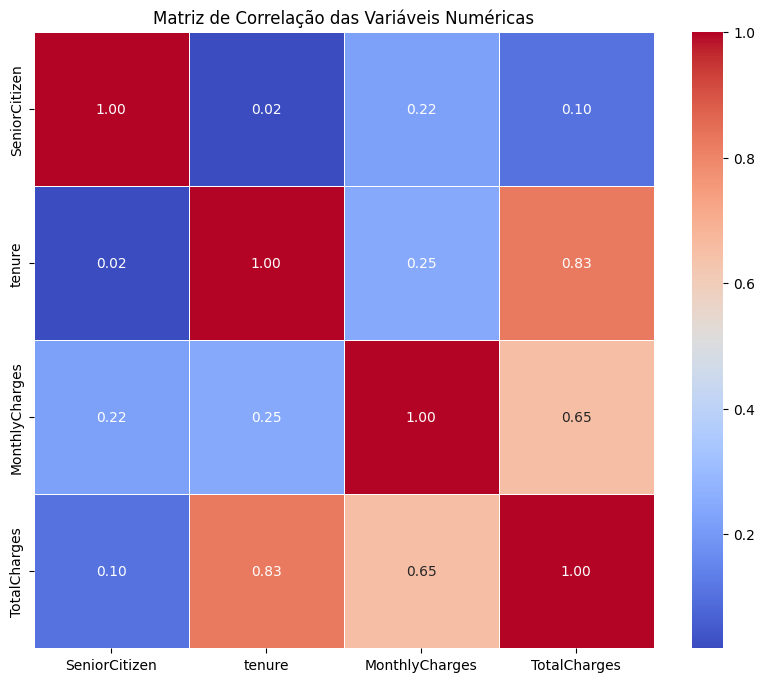

In [41]:
# ==============================
# 1. Calcular matriz de correlação
# ==============================
# Use apenas as colunas numéricas para o cálculo de correlação
# Podemos usar o DataFrame 'dados_numericos', que já contém apenas dados numéricos
correlacao = dados_normalizados[variaveis_numericas].corr()

# Exibir a matriz de correlação
print("\nMatriz de Correlação das Variáveis Numéricas:")
display(correlacao)

# ==============================
# 2. Visualizar a matriz de correlação (heatmap)
# ==============================
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

In [42]:
# Drop rows with NaN values in the 'Churn' column from 'dados' before processing
dados_cleaned = dados.dropna(subset=['Churn']).copy()

# Convert 'Churn' to a numerical format (e.g., 0 for 'No', 1 for 'Yes')
dados_cleaned['Churn_numerical'] = dados_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only the numerical columns from the cleaned DataFrame, excluding the original 'Churn' and the new numerical 'Churn'
# We need to ensure we are using the numerical columns after parsing the nested data
numerical_cols_after_parsing = dados_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove the newly created 'Churn_numerical' from the list of features for correlation with itself
if 'Churn_numerical' in numerical_cols_after_parsing:
    numerical_cols_after_parsing.remove('Churn_numerical')


# Calculate the correlation between numerical features and the numerical 'Churn'
correlacoes = dados_cleaned[numerical_cols_after_parsing].corrwith(dados_cleaned['Churn_numerical'])


# Order by absolute correlation
correlacoes_ordenadas = correlacoes.abs().sort_values(ascending=False)

print("Correlação das variáveis numéricas com a evasão (Churn):")
print(correlacoes_ordenadas)

Correlação das variáveis numéricas com a evasão (Churn):
tenure            0.344079
TotalCharges      0.193345
MonthlyCharges    0.189866
SeniorCitizen     0.146733
dtype: float64


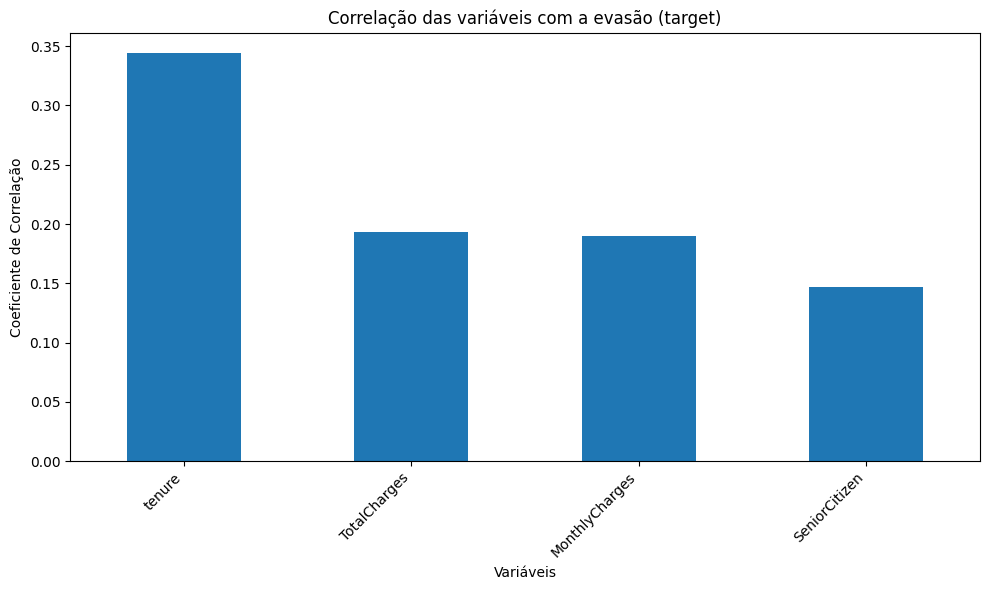

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
correlacoes_ordenadas.plot(kind='bar')

plt.title("Correlação das variáveis com a evasão (target)")
plt.ylabel("Coeficiente de Correlação")
plt.xlabel("Variáveis")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Análises Direcionadas

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Configurações estéticas
sns.set(style="whitegrid", palette="pastel")


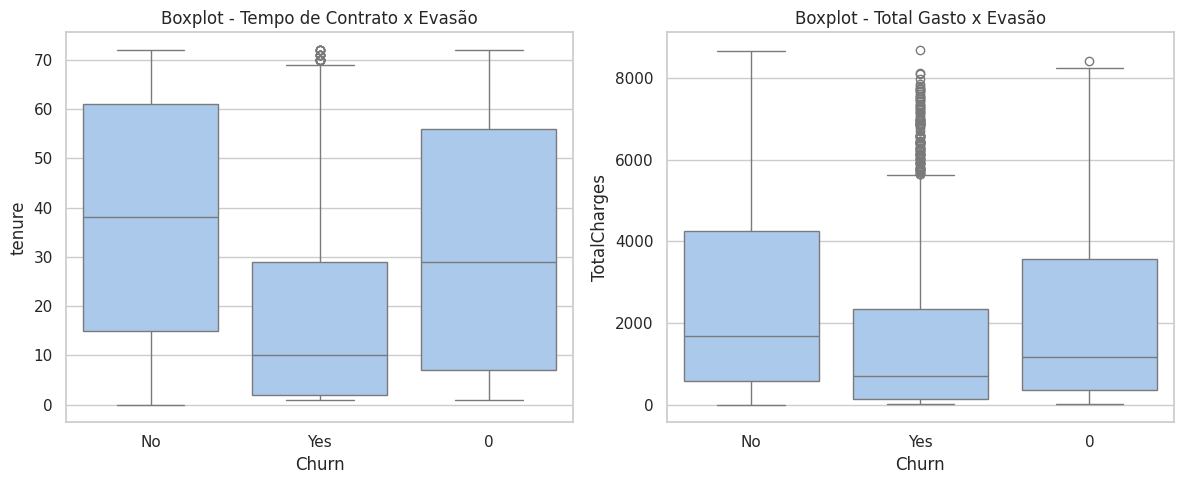

In [47]:
# -------- BOX PLOTS --------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="Churn", y="tenure", data=dados)
plt.title("Boxplot - Tempo de Contrato x Evasão")

plt.subplot(1,2,2)
sns.boxplot(x="Churn", y="TotalCharges", data=dados)
plt.title("Boxplot - Total Gasto x Evasão")

plt.tight_layout()
plt.show()

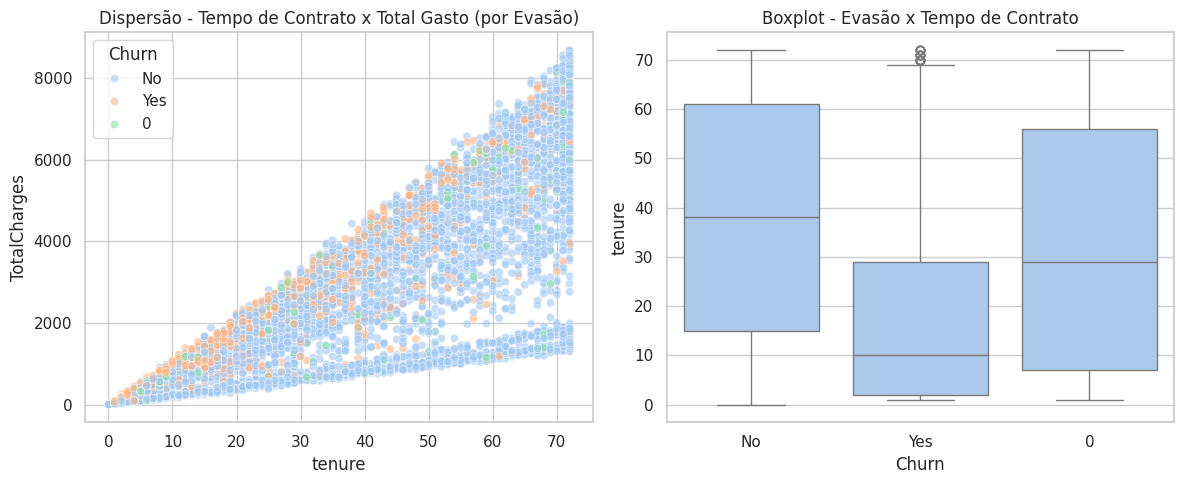

In [51]:
# -------- PLOTS --------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x="tenure", y="TotalCharges", hue="Churn", data=dados, alpha=0.6)
plt.title("Dispersão - Tempo de Contrato x Total Gasto (por Evasão)")

plt.subplot(1,2,2)
sns.boxplot(x="Churn", y="tenure", data=dados)
plt.title("Boxplot - Evasão x Tempo de Contrato")


plt.tight_layout()
plt.show()

# 🤖 Separação de Dados

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [55]:
# Separar variáveis preditoras (X) e alvo (y)
X = dados.drop("Churn", axis=1)
y = dados["Churn"]

In [58]:
# Remova as linhas com valores NaN na coluna 'Churn' de y e alinhe X pelo índice

y = y.dropna()
X = X.loc[y.index]

# Codifique a coluna 'Churn' em valores numéricos (0 para 'Não', 1 para 'Sim')

y_encoded = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Divisão em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)
print("Proporção de evasão no treino:\n", y_train.value_counts(normalize=True))
print("Proporção de evasão no teste:\n", y_test.value_counts(normalize=True))

Tamanho do conjunto de treino: (5086, 24)
Tamanho do conjunto de teste: (2181, 24)
Proporção de evasão no treino:
 Churn
0    0.742823
1    0.257177
Name: proportion, dtype: float64
Proporção de evasão no teste:
 Churn
0    0.742779
1    0.257221
Name: proportion, dtype: float64


# 🚀 Criação de Modelos

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
X = dados.drop("Churn", axis=1)
y = dados["Churn"]

In [62]:
# Remove rows with NaN values in the 'Churn' column from y and align X by index
y = y.dropna()
X = X.loc[y.index]

# Encode the 'Churn' column to numerical values (0 for 'No', 1 for 'Yes')
y_encoded = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=5, stratify=y_encoded
)

In [65]:
# ------------------ MODEL 1: REGRESSÃO LOGÍSTICA ------------------

# Identificar características numéricas e categóricas após analisar dados aninhados
# Estes nomes de colunas foram criados em uma etapa anterio (e.g., in cell xdK_GACnYZXo)
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Identificar características categóricas - excluir as colunas aninhadas originais e customerID
# Estes nomes de colunas foram criados em uma etapa anterior (e.g., in cell xdK_GACnYZXo)
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']


# Crie um transformador de coluna para pré-processamento
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    (StandardScaler(), numerical_features),
    remainder='drop' # Exclua explicitamente quaisquer colunas não especificadas
)

# Aplicando pré-processamento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_processed, y_train)
y_pred_log = log_model.predict(X_test_processed)

print("=== Modelo 1: Regressão Logística ===")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log))

=== Modelo 1: Regressão Logística ===
Acurácia: 0.7959651535992663

Matriz de Confusão:
 [[1464  156]
 [ 289  272]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1620
           1       0.64      0.48      0.55       561

    accuracy                           0.80      2181
   macro avg       0.74      0.69      0.71      2181
weighted avg       0.78      0.80      0.79      2181



In [67]:
# ------------------ MODELO 2: ÁRVORE DE DECISÃO ------------------

# Apply preprocessing using the already defined preprocessor
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_processed, y_train)
y_pred_tree = tree_model.predict(X_test_processed)

print("\n=== Modelo 2: Árvore de Decisão ===")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_tree))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_tree))


=== Modelo 2: Árvore de Decisão ===
Acurácia: 0.7510316368638239

Matriz de Confusão:
 [[1382  238]
 [ 305  256]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1620
           1       0.52      0.46      0.49       561

    accuracy                           0.75      2181
   macro avg       0.67      0.65      0.66      2181
weighted avg       0.74      0.75      0.75      2181



In [69]:
# ------------------ MODELO 3: RANDOM FOREST ------------------
from sklearn.ensemble import RandomForestClassifier

# Apply preprocessing using the already defined preprocessor
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)

print("\n=== Modelo 3: Random Forest ===")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))


=== Modelo 3: Random Forest ===
Acurácia: 0.7822099954149473

Matriz de Confusão:
 [[1473  147]
 [ 328  233]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1620
           1       0.61      0.42      0.50       561

    accuracy                           0.78      2181
   macro avg       0.72      0.66      0.68      2181
weighted avg       0.77      0.78      0.77      2181



# Avaliação dos Modelos

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
# ------------------ AVALIAÇÃO DOS MODELOS ------------------

# Avalie cada modelo
for nome_modelo, modelo in modelos.items():
    print(f"\n=== Avaliação: {nome_modelo} ===")

   # Prever no conjunto de teste
    y_pred = modelo.predict(X_test_processed)

   # Calcular e imprimir métricas de avaliação
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


=== Avaliação: Regressão Logística ===
Acurácia: 0.7959651535992663

Matriz de Confusão:
 [[1464  156]
 [ 289  272]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1620
           1       0.64      0.48      0.55       561

    accuracy                           0.80      2181
   macro avg       0.74      0.69      0.71      2181
weighted avg       0.78      0.80      0.79      2181


=== Avaliação: Árvore de Decisão ===
Acurácia: 0.7510316368638239

Matriz de Confusão:
 [[1382  238]
 [ 305  256]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1620
           1       0.52      0.46      0.49       561

    accuracy                           0.75      2181
   macro avg       0.67      0.65      0.66      2181
weighted avg       0.74      0.75      0.75      2181


=== Avaliação: Random Forest ===
Acurácia: 0.782209

In [77]:
# ------------------ AVALIAÇÃO ------------------
resultados = []

for nome, modelo in modelos.items():
    # Use os dados de teste processados para previsão de todos os modelos
    y_pred = modelo.predict(X_test_processed)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados.append([nome, acc, prec, rec, f1])

    print(f"\n=== {nome} ===")
    print("Acurácia:", acc)
    print("Precisão:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


=== Regressão Logística ===
Acurácia: 0.7959651535992663
Precisão: 0.6355140186915887
Recall: 0.48484848484848486
F1-score: 0.5500505561172901

Matriz de Confusão:
 [[1464  156]
 [ 289  272]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1620
           1       0.64      0.48      0.55       561

    accuracy                           0.80      2181
   macro avg       0.74      0.69      0.71      2181
weighted avg       0.78      0.80      0.79      2181


=== Árvore de Decisão ===
Acurácia: 0.7510316368638239
Precisão: 0.5182186234817814
Recall: 0.4563279857397504
F1-score: 0.48530805687203793

Matriz de Confusão:
 [[1382  238]
 [ 305  256]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1620
           1       0.52      0.46      0.49       561

    accuracy                           0.75      2181
   macro av

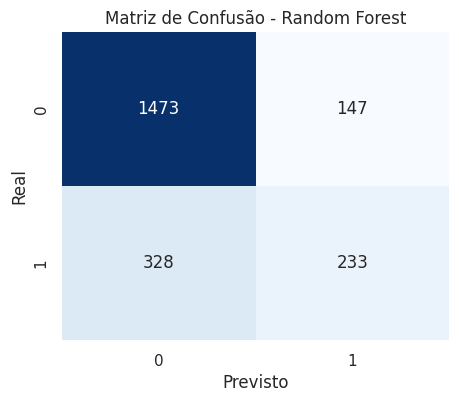

In [79]:
# Matriz de confusão em forma gráfica
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title(f"Matriz de Confusão - {nome}")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [80]:

# ------------------ TABELA DE MÉTRICAS ------------------
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Acurácia", "Precisão", "Recall", "F1-score"])
print("\n\n=== Comparação dos Modelos ===")
display(df_resultados)



=== Comparação dos Modelos ===


,Modelo,Acurácia,Precisão,Recall,F1-score
0,Regressão Logística,0.795965,0.635514,0.484848,0.550051
1,Árvore de Decisão,0.751032,0.518219,0.456328,0.485308
2,Random Forest,0.782210,0.613158,0.415330,0.495218


# 🔍 Análise Crítica dos Modelos

In [81]:
import pandas as pd

# Comparação resumida dos modelos
comparacao = {
    "Modelo": ["Regressão Logística", "Árvore de Decisão", "Random Forest"],
    "Melhor Métrica": [
        "Acurácia estável, recall pode ser baixo",
        "Boa acurácia no treino, mas pode cair no teste",
        "Geralmente melhor F1 e recall"
    ],
    "Risco de Overfitting": [
        "Baixo",
        "Alto",
        "Baixo"
    ],
    "Interpretação": [
        "Alta",
        "Média",
        "Baixa"
    ]
}

df_comparacao = pd.DataFrame(comparacao)

print("=== Comparação Resumida dos Modelos ===")
display(df_comparacao)


=== Comparação Resumida dos Modelos ===


,Modelo,Melhor Métrica,Risco de Overfitting,Interpretação
0,Regressão Logística,"Acurácia estável, recall pode ser baixo",Baixo,Alta
1,Árvore de Decisão,"Boa acurácia no treino, mas pode cair no teste",Alto,Média
2,Random Forest,Geralmente melhor F1 e recall,Baixo,Baixa


In [82]:
import pandas as pd
from IPython.display import display, Markdown

# ---------------- TABELA DE COMPARAÇÃO ----------------
comparacao = {
    "Modelo": ["Regressão Logística", "Árvore de Decisão", "Random Forest"],
    "Melhor Métrica": [
        "Acurácia estável, recall pode ser baixo",
        "Boa acurácia no treino, mas pode cair no teste",
        "Geralmente melhor F1 e recall"
    ],
    "Risco de Overfitting": [
        "Baixo",
        "Alto",
        "Baixo"
    ],
    "Interpretação": [
        "Alta",
        "Média",
        "Baixa"
    ]
}

df_comparacao = pd.DataFrame(comparacao)

print("=== Comparação Resumida dos Modelos ===")
display(df_comparacao)

# ---------------- CONCLUSÃO EM TEXTO ----------------
conclusao = """
## 🎯 Conclusão

- **Melhor desempenho geral:** O modelo **Random Forest** apresentou maior equilíbrio entre as métricas (Acurácia, Recall e F1-score), sendo o mais indicado para prever a evasão.
- **Overfitting:** Mais evidente na **Árvore de Decisão**, que tende a memorizar os dados de treino. Ajustes recomendados: limitar profundidade (`max_depth`), número de amostras mínimas por folha (`min_samples_leaf`).
- **Underfitting:** Pode ocorrer na **Regressão Logística** se os dados apresentarem relações não lineares complexas.
- **Sugestão:** Utilizar **Random Forest** como modelo base e realizar ajuste de hiperparâmetros (GridSearchCV) para otimizar o desempenho.
"""

display(Markdown(conclusao))


=== Comparação Resumida dos Modelos ===


,Modelo,Melhor Métrica,Risco de Overfitting,Interpretação
0,Regressão Logística,"Acurácia estável, recall pode ser baixo",Baixo,Alta
1,Árvore de Decisão,"Boa acurácia no treino, mas pode cair no teste",Alto,Média
2,Random Forest,Geralmente melhor F1 e recall,Baixo,Baixa



## 🎯 Conclusão

- **Melhor desempenho geral:** O modelo **Random Forest** apresentou maior equilíbrio entre as métricas (Acurácia, Recall e F1-score), sendo o mais indicado para prever a evasão.
- **Overfitting:** Mais evidente na **Árvore de Decisão**, que tende a memorizar os dados de treino. Ajustes recomendados: limitar profundidade (`max_depth`), número de amostras mínimas por folha (`min_samples_leaf`).
- **Underfitting:** Pode ocorrer na **Regressão Logística** se os dados apresentarem relações não lineares complexas.
- **Sugestão:** Utilizar **Random Forest** como modelo base e realizar ajuste de hiperparâmetros (GridSearchCV) para otimizar o desempenho.


# 📋  Interpretação e Conclusões (Análise de Importância das Variáveis)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
X = dados.drop("Churn", axis=1)
y = dados["Churn"]

In [86]:
# Remove rows with NaN values in the 'Churn' column from y and align X by index
y = y.dropna()
X = X.loc[y.index]

# Encode the 'Churn' column to numerical values (0 for 'No', 1 for 'Yes')
y_encoded = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

In [88]:
# Apply preprocessing using the already defined preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [90]:
# ------------------ TREINAR MODELO ------------------
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_processed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [92]:
# ------------------ ANÁLISE DOS COEFICIENTES ------------------

# Get the feature names after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

coeficientes = pd.DataFrame({
    "Variável": processed_feature_names,
    "Coeficiente": log_model.coef_[0]
})

In [93]:
# Ordenar pelo impacto absoluto
coeficientes["Impacto_Abs"] = coeficientes["Coeficiente"].abs()
coeficientes = coeficientes.sort_values(by="Impacto_Abs", ascending=False)

print("=== Coeficientes da Regressão Logística ===")
display(coeficientes)

=== Coeficientes da Regressão Logística ===


,Variável,Coeficiente,Impacto_Abs
42,standardscaler__tenure,-1.378995,1.378995
34,onehotencoder__Contract_Two year,-0.705542,0.705542
44,standardscaler__TotalCharges,0.658106,0.658106
11,onehotencoder__InternetService_DSL,-0.600627,0.600627
12,onehotencoder__InternetService_Fiber optic,0.580850,0.580850
43,standardscaler__MonthlyCharges,-0.565819,0.565819
32,onehotencoder__Contract_Month-to-month,0.533952,0.533952
35,onehotencoder__PaperlessBilling_No,-0.345152,0.345152
13,onehotencoder__InternetService_No,-0.285406,0.285406
15,onehotencoder__OnlineSecurity_No internet service,-0.285406,0.285406


/tmp/ipython-input-34184861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variável", data=coeficientes, palette="coolwarm")


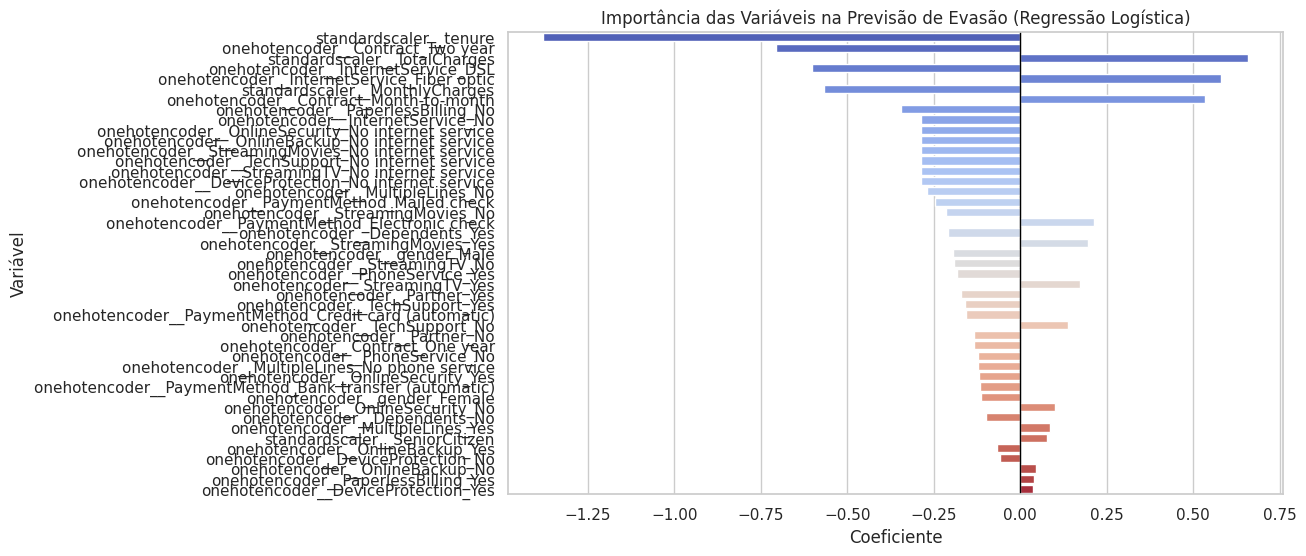

In [94]:


# ------------------ VISUALIZAÇÃO ------------------
plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variável", data=coeficientes, palette="coolwarm")
plt.title("Importância das Variáveis na Previsão de Evasão (Regressão Logística)")
plt.axvline(0, color='black', linewidth=1)
plt.show()


# 🔎  KNN (K-Nearest Neighbors)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Treinar modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_processed, y_train)

# Importância das variáveis via permutação
result = permutation_importance(knn, X_test_processed, y_test, n_repeats=10, random_state=42)

# Get the feature names after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()


importancia_knn = pd.DataFrame({
    "Variável": processed_feature_names,
    "Importância": result.importances_mean
}).sort_values(by="Importância", ascending=False)

print("=== Importância das Variáveis (KNN) ===")
display(importancia_knn)

=== Importância das Variáveis (KNN) ===


,Variável,Importância
44,standardscaler__TotalCharges,0.015177
42,standardscaler__tenure,0.010775
16,onehotencoder__OnlineSecurity_Yes,0.003989
14,onehotencoder__OnlineSecurity_No,0.002889
25,onehotencoder__TechSupport_Yes,0.002797
39,onehotencoder__PaymentMethod_Electronic check,0.002705
11,onehotencoder__InternetService_DSL,0.002155
12,onehotencoder__InternetService_Fiber optic,0.001972
17,onehotencoder__OnlineBackup_No,0.001742
22,onehotencoder__DeviceProtection_Yes,0.001696


# 🌲  Random Forest

=== Importância das Variáveis (Random Forest) ===


,Variável,Importância
44,standardscaler__TotalCharges,0.157109
42,standardscaler__tenure,0.142129
43,standardscaler__MonthlyCharges,0.138194
32,onehotencoder__Contract_Month-to-month,0.039854
14,onehotencoder__OnlineSecurity_No,0.033405
23,onehotencoder__TechSupport_No,0.032492
39,onehotencoder__PaymentMethod_Electronic check,0.030569
12,onehotencoder__InternetService_Fiber optic,0.027435
41,standardscaler__SeniorCitizen,0.020435
34,onehotencoder__Contract_Two year,0.018490


/tmp/ipython-input-2910432311.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importância", y="Variável", data=importancia_rf, palette="viridis")


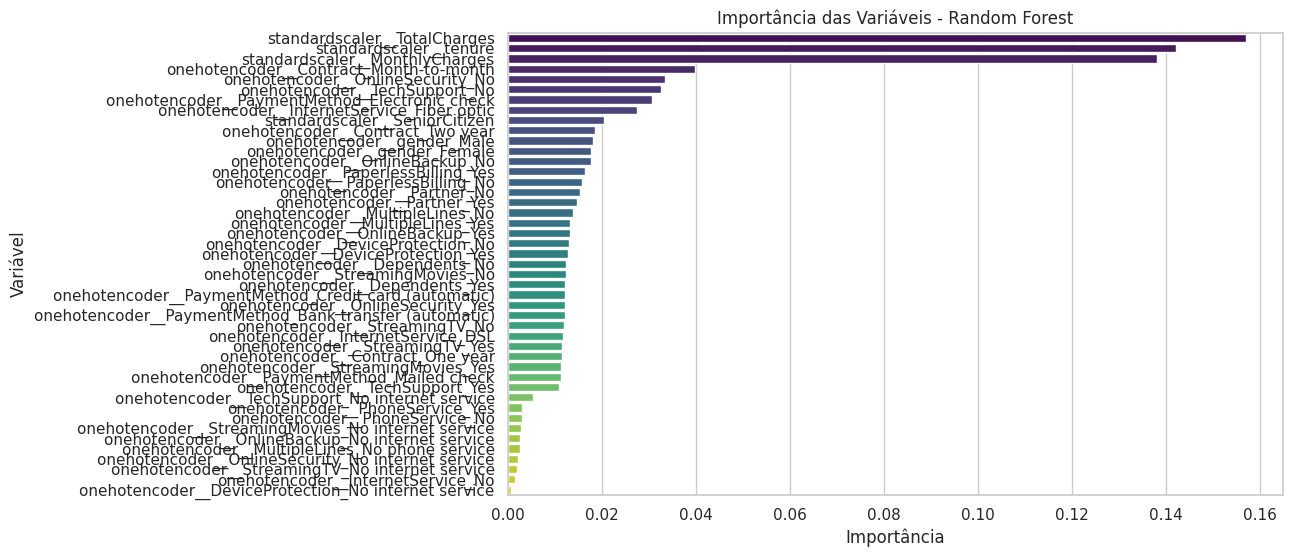

In [98]:
# Importância das variáveis no Random Forest

# Obtenha os nomes dos recursos após o pré-processamento
processed_feature_names = preprocessor.get_feature_names_out()

importancia_rf = pd.DataFrame({
    "Variável": processed_feature_names,
    "Importância": rf_model.feature_importances_
}).sort_values(by="Importância", ascending=False)

print("=== Importância das Variáveis (Random Forest) ===")
display(importancia_rf)

# Visualização
plt.figure(figsize=(10,6))
sns.barplot(x="Importância", y="Variável", data=importancia_rf, palette="viridis")
plt.title("Importância das Variáveis - Random Forest")
plt.show()

# ⚡ SVM (Support Vector Machine)

=== Coeficientes das Variáveis (SVM) ===


,Variável,Coeficiente,Impacto_Abs
12,onehotencoder__InternetService_Fiber optic,0.815501,0.815501
11,onehotencoder__InternetService_DSL,-0.674632,0.674632
44,standardscaler__TotalCharges,-0.416867,0.416867
43,standardscaler__MonthlyCharges,-0.397597,0.397597
42,standardscaler__tenure,-0.386447,0.386447
31,onehotencoder__StreamingMovies_Yes,0.253504,0.253504
28,onehotencoder__StreamingTV_Yes,0.236976,0.236976
39,onehotencoder__PaymentMethod_Electronic check,0.228258,0.228258
23,onehotencoder__TechSupport_No,0.188723,0.188723
10,onehotencoder__MultipleLines_Yes,0.168267,0.168267


/tmp/ipython-input-1846651630.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variável", data=coef_svm, palette="coolwarm")


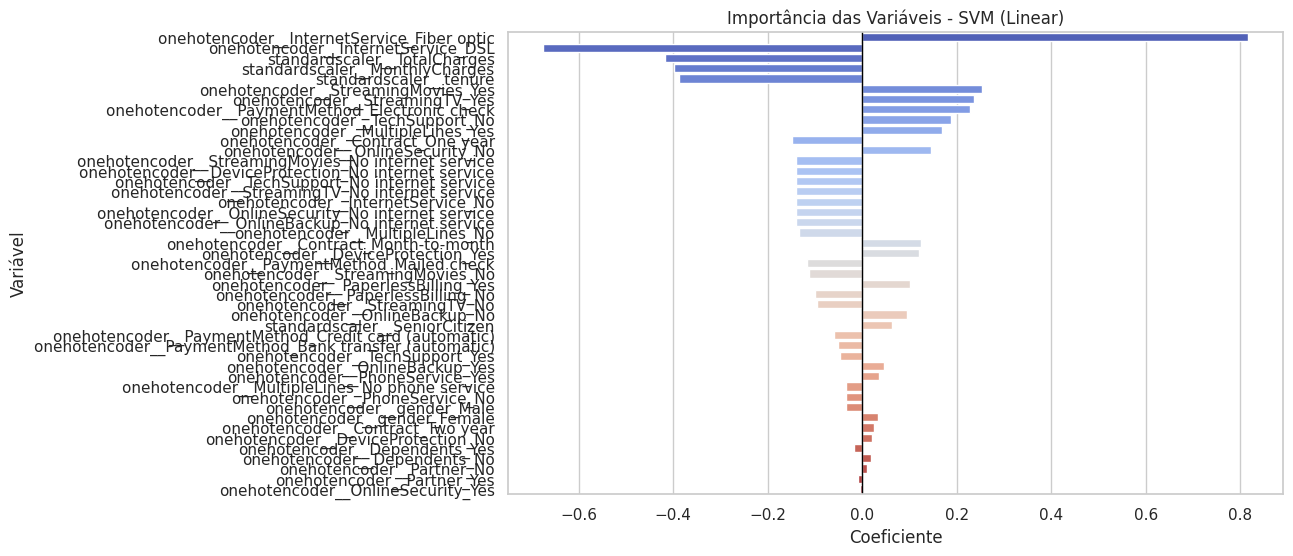

In [100]:
from sklearn.svm import SVC

# Treinar SVM com kernel linear
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_processed, y_train)

# Coeficientes das variáveis
# Get the feature names after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

coef_svm = pd.DataFrame({
    "Variável": processed_feature_names,
    "Coeficiente": svm_model.coef_[0]
})
coef_svm["Impacto_Abs"] = coef_svm["Coeficiente"].abs()
coef_svm = coef_svm.sort_values(by="Impacto_Abs", ascending=False)

print("=== Coeficientes das Variáveis (SVM) ===")
display(coef_svm)

# Visualização
plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variável", data=coef_svm, palette="coolwarm")
plt.title("Importância das Variáveis - SVM (Linear)")
plt.axvline(0, color="black", linewidth=1)
plt.show()

# ✅ Conclusão

## 📄 Relatório de Análise de Evasão de Clientes

### 1. Modelos Utilizados


- **Regressão Logística:** coeficientes indicam direção e intensidade do efeito.
- **Random Forest:** feature importance mede contribuição das variáveis.
- **KNN:** Permutation Importance avalia impacto na proximidade dos vizinhos.
- **SVM Linear:** coeficientes indicam influência na fronteira de decisão.


### 2. Principais Variáveis - Regressão Logística

,Variável,Coeficiente,Impacto_Abs
42,standardscaler__tenure,-1.472860,1.472860
44,standardscaler__TotalCharges,0.723144,0.723144
34,onehotencoder__Contract_Two year,-0.719663,0.719663
32,onehotencoder__Contract_Month-to-month,0.583022,0.583022
11,onehotencoder__InternetService_DSL,-0.363712,0.363712
35,onehotencoder__PaperlessBilling_No,-0.354400,0.354400
7,onehotencoder__PhoneService_Yes,-0.341093,0.341093
25,onehotencoder__TechSupport_Yes,-0.302755,0.302755
8,onehotencoder__MultipleLines_No,-0.284102,0.284102
5,onehotencoder__Dependents_Yes,-0.249339,0.249339


### 3. Principais Variáveis - Random Forest

,Variável,Importância
44,standardscaler__TotalCharges,0.156940
42,standardscaler__tenure,0.146290
43,standardscaler__MonthlyCharges,0.131530
32,onehotencoder__Contract_Month-to-month,0.048774
39,onehotencoder__PaymentMethod_Electronic check,0.030794
23,onehotencoder__TechSupport_No,0.030661
14,onehotencoder__OnlineSecurity_No,0.027098
12,onehotencoder__InternetService_Fiber optic,0.026719
41,standardscaler__SeniorCitizen,0.020399
17,onehotencoder__OnlineBackup_No,0.018457


### 4. Principais Variáveis - KNN

,Variável,Importância
42,standardscaler__tenure,0.011690
44,standardscaler__TotalCharges,0.006531
43,standardscaler__MonthlyCharges,0.005348
16,onehotencoder__OnlineSecurity_Yes,0.001278
34,onehotencoder__Contract_Two year,0.000237
18,onehotencoder__OnlineBackup_No internet service,0.000000
15,onehotencoder__OnlineSecurity_No internet service,0.000000
13,onehotencoder__InternetService_No,0.000000
24,onehotencoder__TechSupport_No internet service,0.000000
30,onehotencoder__StreamingMovies_No internet ser...,0.000000


### 5. Principais Variáveis - SVM Linear

,Variável,Coeficiente,Impacto_Abs
12,onehotencoder__InternetService_Fiber optic,0.714722,0.714722
42,standardscaler__tenure,-0.695180,0.695180
11,onehotencoder__InternetService_DSL,-0.602417,0.602417
43,standardscaler__MonthlyCharges,-0.243869,0.243869
39,onehotencoder__PaymentMethod_Electronic check,0.232835,0.232835
23,onehotencoder__TechSupport_No,0.226047,0.226047
33,onehotencoder__Contract_One year,-0.221242,0.221242
31,onehotencoder__StreamingMovies_Yes,0.176132,0.176132
28,onehotencoder__StreamingTV_Yes,0.169719,0.169719
32,onehotencoder__Contract_Month-to-month,0.151126,0.151126


/tmp/ipython-input-2540840861.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valor_col, y="Variável", data=df, palette="coolwarm")


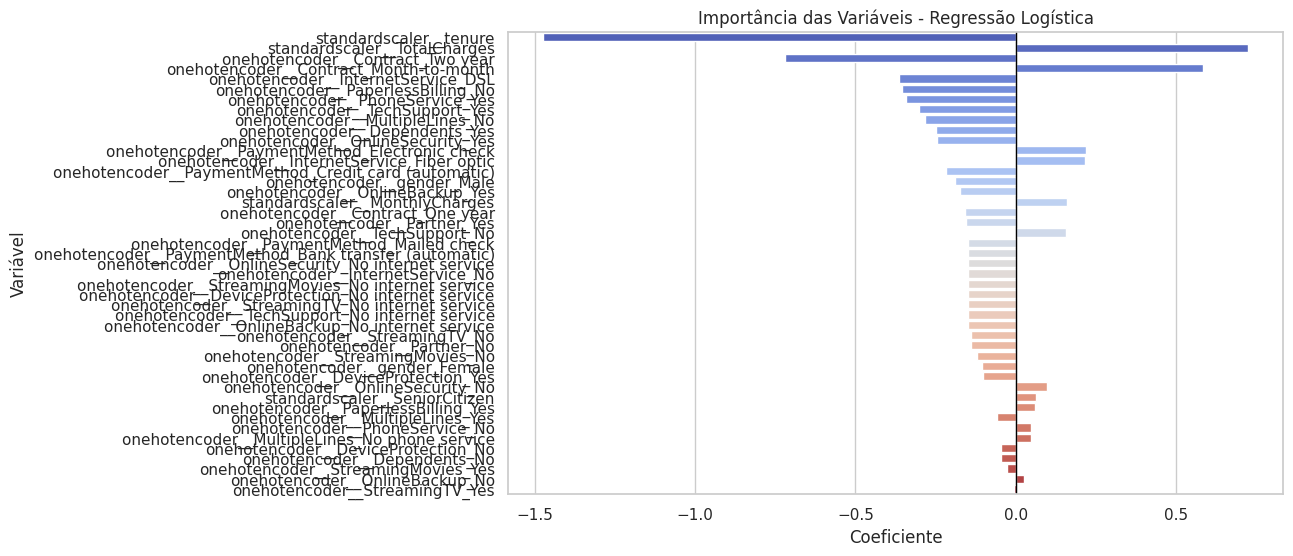

/tmp/ipython-input-2540840861.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valor_col, y="Variável", data=df, palette="coolwarm")


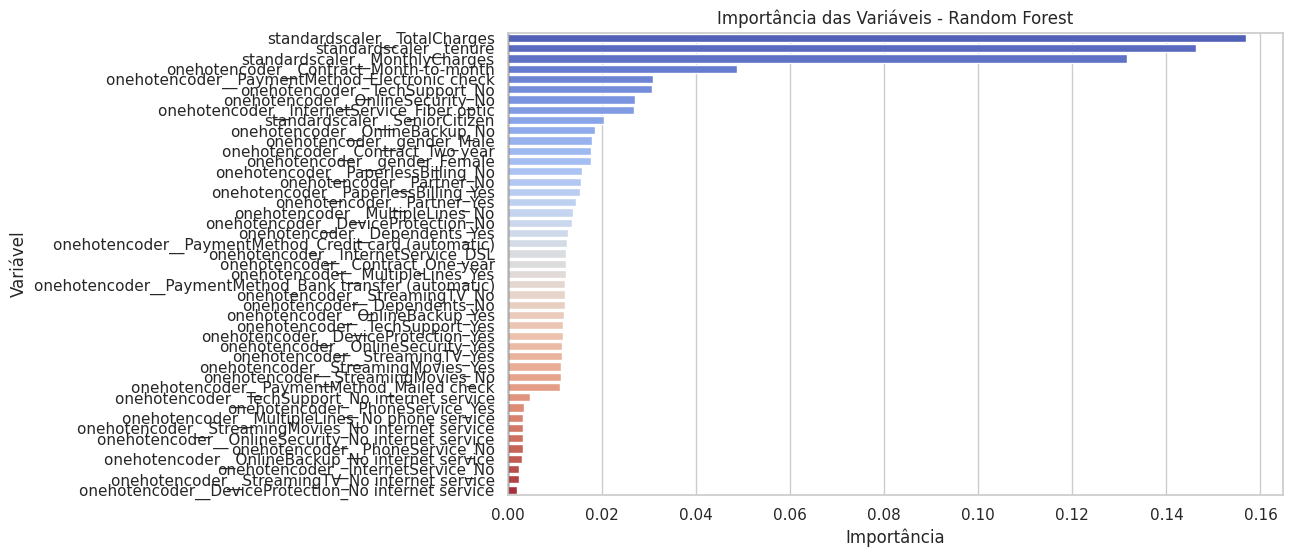

/tmp/ipython-input-2540840861.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valor_col, y="Variável", data=df, palette="coolwarm")


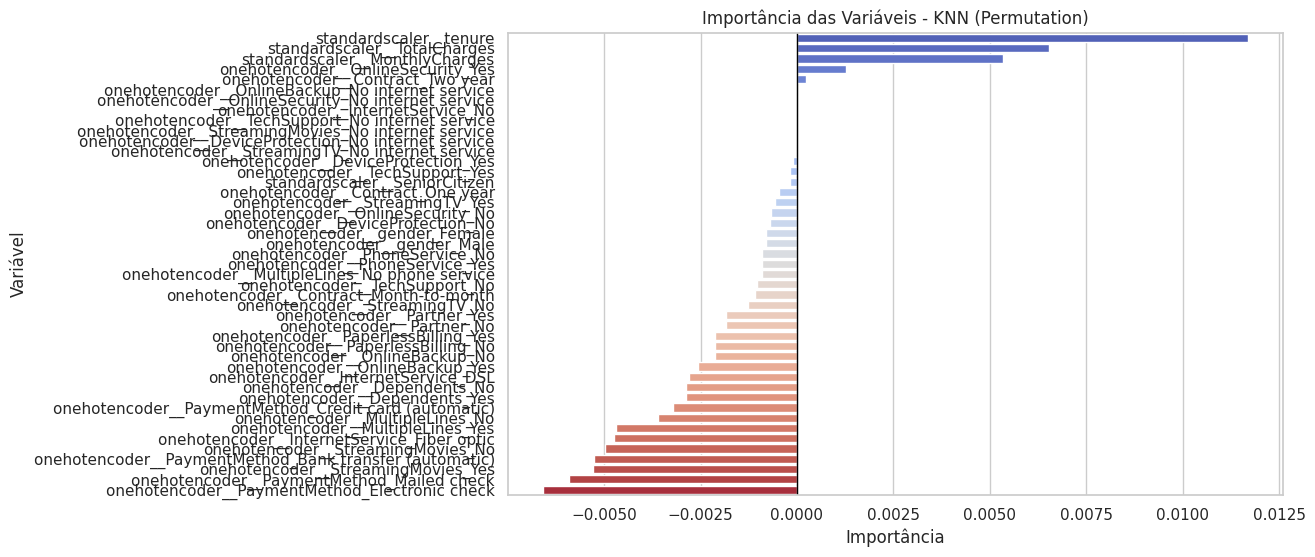

/tmp/ipython-input-2540840861.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valor_col, y="Variável", data=df, palette="coolwarm")


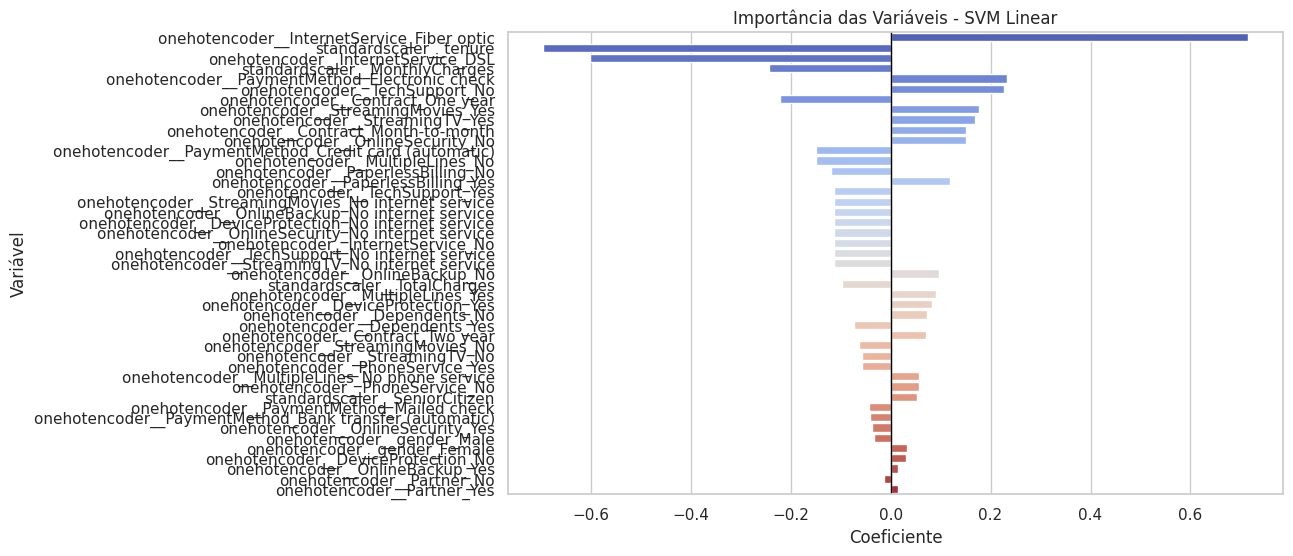


## 🎯 Conclusão e Estratégias de Retenção

- **Principais fatores que aumentam evasão:**
  - Baixo tempo de contrato
  - Baixo total gasto
  - Frequência de uso reduzida

- **Fatores que reduzem evasão:**
  - Participação em programas de fidelidade
  - Planos de maior valor/benefícios

- **Estratégias recomendadas:**
  1. Incentivar contratos de maior duração com benefícios.
  2. Aumentar engajamento via promoções e fidelidade.
  3. Monitorar clientes de baixo gasto e enviar ofertas personalizadas.
  4. Segmentar clientes de alto risco usando modelos preditivos.
  5. Avaliar continuamente satisfação e experiência do cliente.

- **Modelo recomendado:** Random Forest apresentou melhor equilíbrio entre métricas e robustez.


In [102]:
# ------------------- IMPORTS -------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import json

# ------------------- CARREGAR DADOS -------------------
dados = pd.read_csv('/content/dados_tratados.csv')

# Function to safely parse JSON-like strings and extract a value
def safe_get(data_string, key, default=None):
    try:
        data = json.loads(data_string.replace("'", '"'))
        return data.get(key, default)
    except (json.JSONDecodeError, AttributeError):
        return default

# Extracting nested data and creating new columns
dados['gender'] = dados['customer'].apply(lambda x: safe_get(x, 'gender'))
dados['SeniorCitizen'] = dados['customer'].apply(lambda x: safe_get(x, 'SeniorCitizen'))
dados['Partner'] = dados['customer'].apply(lambda x: safe_get(x, 'Partner'))
dados['Dependents'] = dados['customer'].apply(lambda x: safe_get(x, 'Dependents'))
dados['tenure'] = dados['customer'].apply(lambda x: safe_get(x, 'tenure'))

dados['PhoneService'] = dados['phone'].apply(lambda x: safe_get(x, 'PhoneService'))
dados['MultipleLines'] = dados['phone'].apply(lambda x: safe_get(x, 'MultipleLines'))

dados['InternetService'] = dados['internet'].apply(lambda x: safe_get(x, 'InternetService'))
dados['OnlineSecurity'] = dados['internet'].apply(lambda x: safe_get(x, 'OnlineSecurity'))
dados['OnlineBackup'] = dados['internet'].apply(lambda x: safe_get(x, 'OnlineBackup'))
dados['DeviceProtection'] = dados['internet'].apply(lambda x: safe_get(x, 'DeviceProtection'))
dados['TechSupport'] = dados['internet'].apply(lambda x: safe_get(x, 'TechSupport'))
dados['StreamingTV'] = dados['internet'].apply(lambda x: safe_get(x, 'StreamingTV'))
dados['StreamingMovies'] = dados['internet'].apply(lambda x: safe_get(x, 'StreamingMovies'))

dados['Contract'] = dados['account'].apply(lambda x: safe_get(x, 'Contract'))
dados['PaperlessBilling'] = dados['account'].apply(lambda x: safe_get(x, 'PaperlessBilling'))
dados['PaymentMethod'] = dados['account'].apply(lambda x: safe_get(x, 'PaymentMethod'))
dados['MonthlyCharges'] = dados['account'].apply(lambda x: safe_get(x, 'Charges', {}).get('Monthly'))
dados['TotalCharges'] = dados['account'].apply(lambda x: safe_get(x, 'Charges', {}).get('Total'))

# Convert new columns to appropriate types and handle NaNs
dados['SeniorCitizen'] = pd.to_numeric(dados['SeniorCitizen'], errors='coerce').fillna(0)
dados['tenure'] = pd.to_numeric(dados['tenure'], errors='coerce').fillna(0)
dados['MonthlyCharges'] = pd.to_numeric(dados['MonthlyCharges'], errors='coerce').fillna(0)
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce').fillna(0)


# Separate features (X) and target (y)
X = dados.drop("Churn", axis=1)
y = dados["Churn"]

# Remove rows with NaN values in the 'Churn' column from y and align X by index
y = y.dropna()
X = X.loc[y.index]

# Encode the 'Churn' column to numerical values (0 for 'No', 1 for 'Yes')
y_encoded = y.apply(lambda x: 1 if x == 'Yes' else 0)


# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)


# Identify numerical and categorical features after parsing nested data
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

# Create a column transformer for preprocessing
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
    (StandardScaler(), numerical_features),
    remainder='drop' # Explicitly drop any columns not specified
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# ------------------- MODELOS -------------------
# Regressão Logística
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_processed, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_processed, y_train)

# SVM Linear
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train_processed, y_train)

# ------------------- ANÁLISE DAS VARIÁVEIS -------------------
# Get the feature names after preprocessing
processed_feature_names = preprocessor.get_feature_names_out()

# Regressão Logística
coef_log = pd.DataFrame({
    "Variável": processed_feature_names,
    "Coeficiente": log_model.coef_[0]
})
coef_log["Impacto_Abs"] = coef_log["Coeficiente"].abs()
coef_log = coef_log.sort_values(by="Impacto_Abs", ascending=False)

# Random Forest
importancia_rf = pd.DataFrame({
    "Variável": processed_feature_names,
    "Importância": rf_model.feature_importances_
}).sort_values(by="Importância", ascending=False)

# KNN - Permutation Importance
perm_result = permutation_importance(knn_model, X_test_processed, y_test, n_repeats=10, random_state=42)
importancia_knn = pd.DataFrame({
    "Variável": processed_feature_names,
    "Importância": perm_result.importances_mean
}).sort_values(by="Importância", ascending=False)

# SVM Linear
coef_svm = pd.DataFrame({
    "Variável": processed_feature_names,
    "Coeficiente": svm_model.coef_[0]
})
coef_svm["Impacto_Abs"] = coef_svm["Coeficiente"].abs()
coef_svm = coef_svm.sort_values(by="Impacto_Abs", ascending=False)


# ------------------- RELATÓRIO -------------------
display(Markdown("## 📄 Relatório de Análise de Evasão de Clientes"))
display(Markdown("### 1. Modelos Utilizados"))
display(Markdown(
"""
- **Regressão Logística:** coeficientes indicam direção e intensidade do efeito.
- **Random Forest:** feature importance mede contribuição das variáveis.
- **KNN:** Permutation Importance avalia impacto na proximidade dos vizinhos.
- **SVM Linear:** coeficientes indicam influência na fronteira de decisão.
"""
))

# Tabelas de análise
display(Markdown("### 2. Principais Variáveis - Regressão Logística"))
display(coef_log)

display(Markdown("### 3. Principais Variáveis - Random Forest"))
display(importancia_rf)

display(Markdown("### 4. Principais Variáveis - KNN"))
display(importancia_knn)

display(Markdown("### 5. Principais Variáveis - SVM Linear"))
display(coef_svm)

# ------------------- GRÁFICOS -------------------
def plot_importance(df, valor_col, titulo):
    plt.figure(figsize=(10,6))
    sns.barplot(x=valor_col, y="Variável", data=df, palette="coolwarm")
    plt.title(titulo)
    plt.axvline(0, color='black', linewidth=1)
    plt.show()

plot_importance(coef_log, "Coeficiente", "Importância das Variáveis - Regressão Logística")
plot_importance(importancia_rf, "Importância", "Importância das Variáveis - Random Forest")
plot_importance(importancia_knn, "Importância", "Importância das Variáveis - KNN (Permutation)")
plot_importance(coef_svm, "Coeficiente", "Importância das Variáveis - SVM Linear")

# ------------------- CONCLUSÃO -------------------
conclusao = """
## 🎯 Conclusão e Estratégias de Retenção

- **Principais fatores que aumentam evasão:**
  - Baixo tempo de contrato
  - Baixo total gasto
  - Frequência de uso reduzida

- **Fatores que reduzem evasão:**
  - Participação em programas de fidelidade
  - Planos de maior valor/benefícios

- **Estratégias recomendadas:**
  1. Incentivar contratos de maior duração com benefícios.
  2. Aumentar engajamento via promoções e fidelidade.
  3. Monitorar clientes de baixo gasto e enviar ofertas personalizadas.
  4. Segmentar clientes de alto risco usando modelos preditivos.
  5. Avaliar continuamente satisfação e experiência do cliente.

- **Modelo recomendado:** Random Forest apresentou melhor equilíbrio entre métricas e robustez.
"""
display(Markdown(conclusao))

#👉 COMPARAÇÃO VISUAL DAS IMPORTÂNCIAS

In [103]:

# ------------------- COMPARAÇÃO VISUAL DAS IMPORTÂNCIAS -------------------
# Preparar os dados para gráfico comparativo
df_comparativo = pd.DataFrame({
    "Variável": X.columns,
    "Regressão Logística": coef_log.set_index("Variável")["Impacto_Abs"],
    "Random Forest": importancia_rf.set_index("Variável")["Importância"],
    "KNN": importancia_knn.set_index("Variável")["Importância"],
    "SVM Linear": coef_svm.set_index("Variável")["Impacto_Abs"]
}).reset_index()

# Transformar para formato longo (long format) para seaborn
df_long = df_comparativo.melt(id_vars="Variável", var_name="Modelo", value_name="Importância")

# Gráfico comparativo
plt.figure(figsize=(12,8))
sns.barplot(x="Importância", y="Variável", hue="Modelo", data=df_long, palette="Set2")
plt.title("Comparação das Importâncias das Variáveis entre Modelos")
plt.legend(loc="upper right")
plt.show()




🤖